# Investigating Numpy.random

## About the package

## Simple Random Data 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Randn()

The Randn function, gives you a random number from the standard normal distribution, with mean zero and standard deviation 1. So by the Empirical Rule, we can expect to find 99.7% of data between - 3 and +3, as shown below. 

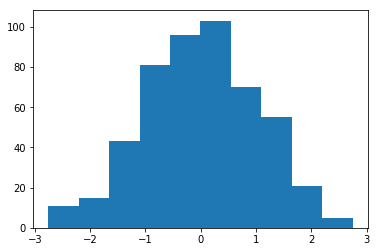

In [19]:
x = np.random.randn(500)
plt.hist(x)
plt.show()

### Randint()

In [24]:
x = np.random.randint(1000)
x

150

This appears to give a number between 0 and 1000. When I tried randint(-100) I got an error. Needs some more investigation... 

## Permutations

## Distributions

### One 

### Two

### Three

### Four

### FIve

## Seeds and Pseudo-random Numbers

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)